<a href="https://colab.research.google.com/github/Paulina9555/Repo1/blob/master/Regresja_zad_trenera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importy



In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import numpy as np
import pandas as pd
from time import sleep
from matplotlib import pyplot as plt

# Scrapping

In [ ]:
page_number = 1
url = f'https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/slaskie/katowice/katowice/katowice?viewType=listing&limit=72&page={page_number}'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [ ]:
response = requests.get(url, headers=headers)

In [ ]:
response

<Response [200]>

In [ ]:
content = response.text

In [ ]:
soup = BeautifulSoup(content, 'html.parser')

## I sposób

In [ ]:
offers = soup.find_all('li', {'class': 'css-o9b79t e1dfeild0'})

In [ ]:
len(offers)

76

In [ ]:
offer = offers[0]

In [ ]:
offer_url = 'https://www.otodom.pl' + offer.find('a', {'data-cy': 'listing-item-link'})['href']
details = offer.find_all('span', {'class': 'css-1cyxwvy ei6hyam2'})
price = float(details[0].get_text().replace('\xa0','').replace('zł','')) if details[0].get_text() != 'Zapytaj o cenę' else None
rooms = int(details[2].get_text().split(' ')[0])
area = float(details[3].get_text().split(' ')[0])
location = offer.find('p', {'class': 'css-19dkezj e1n06ry54'}).get_text().split(',')[-3].strip()

AttributeError: ignored

In [ ]:
print(soup.prettify())

In [ ]:
def get_offers(page_number):
  url = f'https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/slaskie/katowice/katowice/katowice?viewType=listing&limit=72&page={page_number}'
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
  response = requests.get(url, headers=headers)
  sleep(3)
  content = response.text
  soup = BeautifulSoup(content, 'html.parser')
  return soup.find_all('li', {'class': 'css-o9b79t e1dfeild0'})


def get_url(offer):
  return 'https://www.otodom.pl' + offer.find('a', {'data-cy': 'listing-item-link'})['href']


def get_details(offer):
  return offer.find_all('span', {'class': 'css-1cyxwvy ei6hyam2'})


def get_price(details):
  return float(details[0].get_text().replace('\xa0','').replace('zł','')) if details[0].get_text() != 'Zapytaj o cenę' else None


def get_rooms(details):
  return int(details[2].get_text().split(' ')[0])


def get_area(details):
  return float(details[3].get_text().split(' ')[0])


def get_location(offer):
  return offer.find('p', {'class': 'css-19dkezj e1n06ry53'}).get_text().split(',')[-3].strip()


def parse_offer(offer):
  url = get_url(offer)
  details = get_details(offer)
  price = get_price(details)
  rooms = get_rooms(details)
  area = get_area(details)
  location = get_location(offer)
  return {'url': url,
          'price': price,
          'rooms': rooms,
          'area': area,
          'location': location}

In [ ]:
data = []

for page_number in range(1,11):
  offers = get_offers(page_number)
  for i, offer in enumerate(offers):
    try:
      data.append(parse_offer(offer))
      if (i + 1) % 10 == 0:
        print(f'Parsed {i} offers from page {page_number}')
    except:
      print('warning')

In [ ]:
data[0]

{'url': 'https://www.otodom.pl/pl/oferta/muchowiec-4-pokojowe-mieszkanie-uklad-doskonaly-ID4naTt',
 'price': 1209000.0,
 'rooms': 4,
 'area': 93.0,
 'location': 'Osiedle Paderewskiego-Muchowiec'}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,url,price,rooms,area,location
0,https://www.otodom.pl/pl/oferta/muchowiec-4-po...,1209000.0,4,93.00,Osiedle Paderewskiego-Muchowiec
1,https://www.otodom.pl/pl/oferta/3-pokojowe-mie...,436000.0,3,50.00,Osiedle Tysiąclecia
2,https://www.otodom.pl/pl/oferta/mieszkanie-na-...,690000.0,3,60.00,Ligota-Panewniki
3,https://www.otodom.pl/pl/oferta/rzepakowa-3-po...,858000.0,3,65.74,Piotrowice-Ochojec
4,https://www.otodom.pl/pl/oferta/ochojec-nowe-b...,699000.0,3,72.72,Piotrowice-Ochojec
...,...,...,...,...,...
739,https://www.otodom.pl/pl/oferta/49m2-2-pokoje-...,201000.0,2,49.00,Załęże
740,https://www.otodom.pl/pl/oferta/m3-w-bloku-tuz...,269000.0,2,44.00,Załęże
741,https://www.otodom.pl/pl/oferta/sprzedam-wynaj...,449000.0,3,64.00,Piotrowice-Ochojec
742,https://www.otodom.pl/pl/oferta/katowice-giszo...,255000.0,2,43.00,Giszowiec


In [ ]:
df.to_csv('otodom.csv')

## II sposób

In [ ]:
print(soup.prettify())

In [ ]:
text = soup.find('script', {'id': "__NEXT_DATA__"}).get_text()

In [ ]:
import json

In [ ]:
data_json = json.loads(text)

In [ ]:
offers = data_json['props']['pageProps']['data']['searchAds']['items']

In [ ]:
offers[0]['areaInSquareMeters']

44.18

In [ ]:
offers[0]['totalPrice']['value']

665000

In [ ]:
offers[0]['title']

'Apartament w Dolinie Trzech Stawów - Pułaskiego 19'

In [ ]:
data = []

for offer in offers:
  try:
    price = offer['totalPrice']['value']
  except:
    price = None

  data.append({'title': offer['title'],
               'price': price})

In [ ]:
df = pd.DataFrame(data)
df

# EDA (eksploracyjna analiza danych)

In [ ]:
df = pd.read_csv('otodom.csv')

In [ ]:
df

In [ ]:
df.describe()

,price,rooms,area
count,2.680000e+03,3613.000000,3615.000000
mean,5.841718e+05,2.575145,60.609585
std,3.013024e+05,0.971471,29.532946
min,8.588800e+04,1.000000,12.700000
25%,4.089795e+05,2.000000,42.640000
50%,5.175120e+05,2.000000,53.200000
75%,6.806310e+05,3.000000,71.430000
max,4.050000e+06,9.000000,745.000000


In [ ]:
df['location'].str.strip().value_counts()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   url       3615 non-null   object 
 1   price     2680 non-null   float64
 2   rooms     3613 non-null   float64
 3   area      3615 non-null   float64
 4   location  3614 non-null   object 
dtypes: float64(3), object(2)
memory usage: 141.3+ KB


In [ ]:
df.duplicated().sum()

147

### Pandas profilling

In [ ]:
!pip install pandas_profiling --upgrade
!pip install markupsafe==2.0.1

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-53-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
from pandas._libs.lib import infer_dtype
prof = ProfileReport(df, infer_dtypes=False)

In [ ]:
prof.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = df.drop_duplicates()
df = df[df['price'].notnull()]

In [ ]:
price_95p = df['price'].quantile(0.95)

In [ ]:
df = df[df['price'] <= price_95p]

In [ ]:
prof = ProfileReport(df, infer_dtypes=False)
prof.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Seaborn

In [ ]:
import seaborn as sns

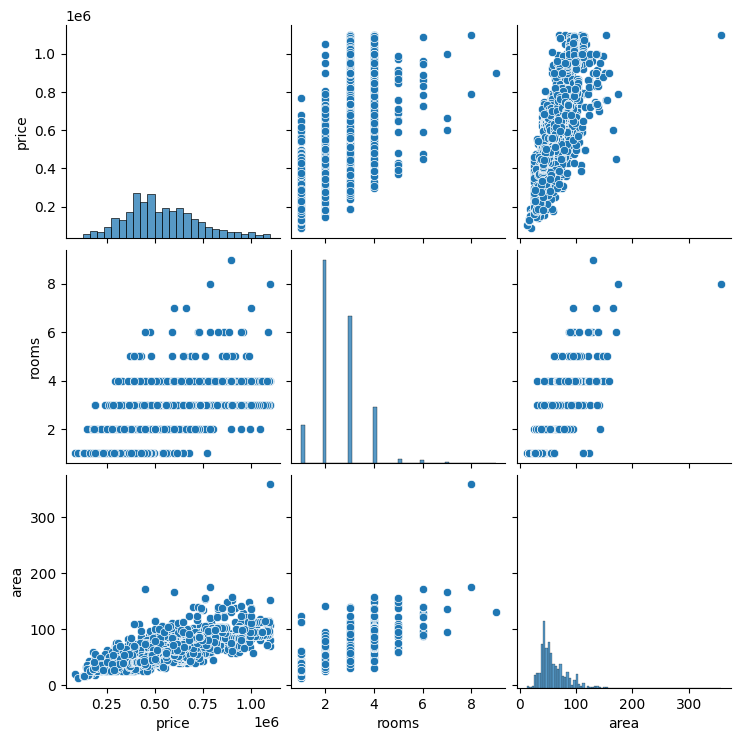

In [ ]:
sns.pairplot(df)

<ipython-input-67-713f4f55dade>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


<Axes: >

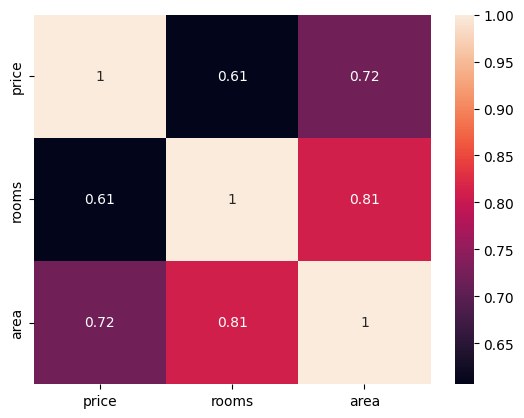

In [ ]:
cm = df.corr()
sns.heatmap(cm, annot=True)

<Axes: >

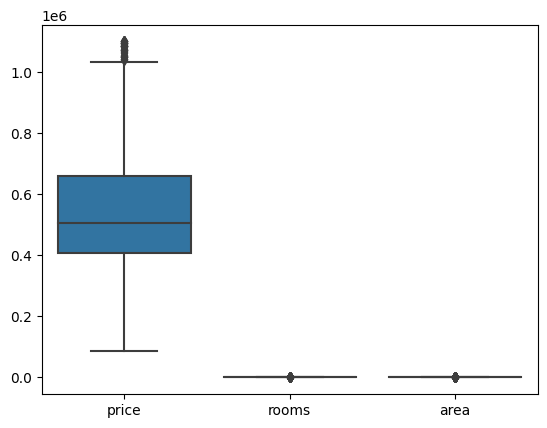

In [ ]:
sns.boxplot(df)

In [ ]:
df_std = (df - df.mean()) / df.std()

<ipython-input-69-7c27e3b245df>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = (df - df.mean()) / df.std()
<ipython-input-69-7c27e3b245df>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = (df - df.mean()) / df.std()


<Axes: >

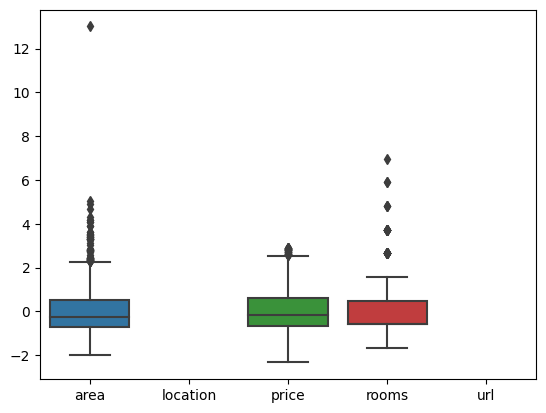

In [ ]:
sns.boxplot(df_std)

# Regresja

## Regresja jednej zmiennej

In [ ]:
df = df[df['area'] <= 250]

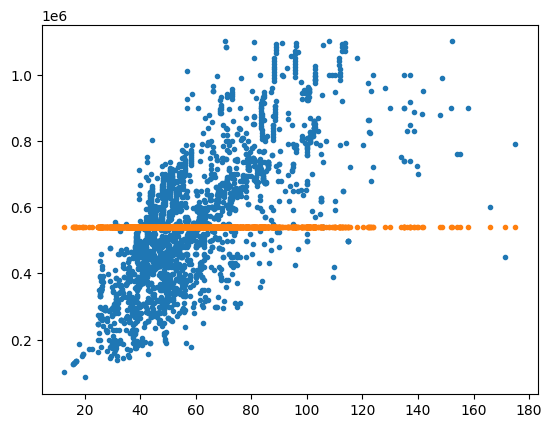

In [ ]:
X = df['area']
y = df['price']

plt.plot(X, y, '.')

a = 0
b = y.mean()

y_pred = a * X + b
plt.plot(X, y_pred, '.')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['area']]
y = df['price']

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
y_pred = lr.predict(X)

In [ ]:
y_pred

array([444833.3723473 , 352399.82221739, 735887.11151068, ...,
       532469.33337012, 440803.39749735, 341013.5440699 ])

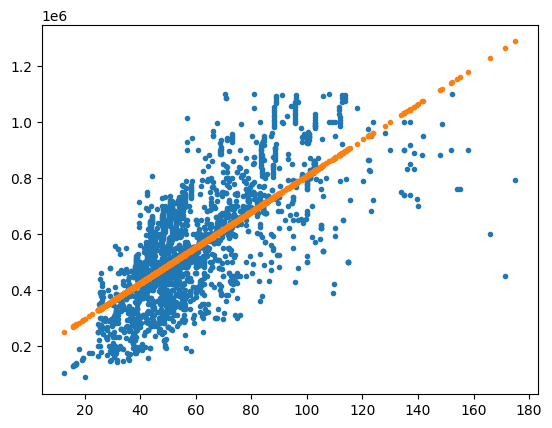

In [ ]:
plt.plot(X, y, '.')
plt.plot(X, y_pred, '.')

In [ ]:
lr.coef_

array([6396.78547612])

In [ ]:
lr.intercept_

166573.2041361609

## Regresja wielu zmiennych

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df, x='area', y='rooms', z='price')
fig.show()

In [ ]:
X = df[['area', 'rooms']]
y = df[['price']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [ ]:
sc.mean_

array([58.31809701,  2.54892206])

In [ ]:
sc.var_

array([492.92759551,   0.842134  ])

In [ ]:
X_std = sc.transform(X)

In [ ]:
X.values.mean(axis=0)

array([58.31809701,  2.54892206])

In [ ]:
X_std.mean(axis=0)
X_std.std(axis=0)

array([1., 1.])

In [ ]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_std, y)

LinearRegression()

In [ ]:
lr.coef_

array([[137490.20014858,   5569.94571298]])

In [ ]:
sample = X.sample()

In [ ]:
sample

,area,rooms
683,62.9,3.0


In [ ]:
sample_std = sc.transform(sample)

In [ ]:
lr.predict(sample_std)

array([[570733.78419008]])

In [ ]:
lr.score(X_std, y)

0.5350611688821982

In [ ]:
df['location'].str.strip().value_counts()

In [ ]:
df['location'] = df['location'].str.strip()

In [ ]:
df['location'].value_counts()

Koszutka                           698
Śródmieście                        411
Wełnowiec-Józefowiec               322
Osiedle Paderewskiego-Muchowiec    157
Ligota-Panewniki                   120
Dąb                                104
Piotrowice-Ochojec                  97
Kostuchna                           71
Brynów-Osiedle Zgrzebnioka          58
Załęska Hałda-Brynów                53
Osiedle Tysiąclecia                 49
Szopienice-Burowiec                 42
Załęże                              37
Giszowiec                           32
Bogucice                            32
Janów-Nikiszowiec                   32
Dąbrówka Mała                       30
Zawodzie                            26
Zarzecze                            10
Murcki                               9
Osiedle Witosa                       8
Podlesie                             5
Centrum                              2
WPKiW                                2
Bytków                               1
Chorzów Batory           

## Regresja ze zmiennymi kategorycznymi

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(min_frequency=0.1,
                    handle_unknown='ignore')

In [ ]:
ohe.fit(df[['location']])

OneHotEncoder()

In [ ]:
location_ohe = ohe.transform(df[['location']])

In [ ]:
location_ohe = ohe.fit_transform(df[['location']])

In [ ]:
location_ohe.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ohe.get_feature_names_out()

array(['location_Bogucice', 'location_Brynów-Osiedle Zgrzebnioka',
       'location_Bytków', 'location_Centrum', 'location_Chorzów Batory',
       'location_Dąb', 'location_Dąbrówka Mała', 'location_Giszowiec',
       'location_Janów-Nikiszowiec', 'location_Kostuchna',
       'location_Koszutka', 'location_Ligota-Panewniki',
       'location_Murcki', 'location_Osiedle Paderewskiego-Muchowiec',
       'location_Osiedle Tysiąclecia', 'location_Osiedle Witosa',
       'location_Piotrowice-Ochojec', 'location_Podlesie',
       'location_Szopienice-Burowiec', 'location_WPKiW',
       'location_Wełnowiec-Józefowiec', 'location_Zarzecze',
       'location_Zawodzie', 'location_Załęska Hałda-Brynów',
       'location_Załęże', 'location_al. Spacerowa',
       'location_ul. Wiosny Ludów', 'location_Śródmieście',
       'location_nan'], dtype=object)

In [ ]:
pd.DataFrame(location_ohe.toarray(),
             columns = ohe.get_feature_names_out())

,location_Koszutka,location_Wełnowiec-Józefowiec,location_Śródmieście,location_infrequent_sklearn
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
2407,0.0,0.0,1.0,0.0
2408,0.0,0.0,0.0,1.0
2409,0.0,1.0,0.0,0.0
2410,0.0,1.0,0.0,0.0


In [ ]:
sample = pd.DataFrame([{'location': 'Koszsutka'}])

In [ ]:
sample

,location
0,Koszsutka


In [ ]:
ohe.transform(sample).toarray()

array([[0., 0., 0., 0.]])

In [ ]:
numeric_features = ['area', 'rooms']
categorical_features = ['location']

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
sc = StandardScaler()
ohe = OneHotEncoder(min_frequency=0.1,
                    handle_unknown='ignore')

In [ ]:
cf = ColumnTransformer(
    transformers = [
        ('sc', sc, numeric_features),
        ('ohe', ohe, categorical_features)
    ]
)

In [ ]:
X = df[['area', 'rooms', 'location']]
X = df[numeric_features + categorical_features]
X

In [ ]:
X_processed = cf.fit_transform(X)

In [ ]:
cf.get_feature_names_out()

array(['sc__area', 'sc__rooms', 'ohe__location_Koszutka',
       'ohe__location_Wełnowiec-Józefowiec', 'ohe__location_Śródmieście',
       'ohe__location_infrequent_sklearn'], dtype=object)

In [ ]:
pd.DataFrame(X_processed,
             columns = cf.get_feature_names_out())

,sc__area,sc__rooms,ohe__location_Koszutka,ohe__location_Wełnowiec-Józefowiec,ohe__location_Śródmieście,ohe__location_infrequent_sklearn
0,-0.667423,-0.598164,0.0,0.0,0.0,1.0
1,-1.318266,-1.687870,0.0,0.0,1.0,0.0
2,1.381945,1.581249,0.0,0.0,1.0,0.0
3,-0.983160,-0.598164,0.0,0.0,0.0,1.0
4,-0.854343,-0.598164,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
2407,1.452659,0.491542,0.0,0.0,1.0,0.0
2408,-0.180979,-0.598164,0.0,0.0,0.0,1.0
2409,-0.050360,0.491542,0.0,1.0,0.0,0.0
2410,-0.695798,0.491542,0.0,1.0,0.0,0.0


In [ ]:
lr = LinearRegression()
lr.fit(X_processed, y)

LinearRegression()

In [ ]:
lr.score(X_processed, y)

0.5807121100772723

In [ ]:
sample = X.sample()

In [ ]:
sample

,area,rooms,location
407,35.35,2.0,Wełnowiec-Józefowiec


In [ ]:
sample = cf.transform(sample)
lr.predict(sample)

array([[375766.29799714]])

## Regresja liniowa wielomianowa

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df[['area']]
y = df[['price']]

In [ ]:
pf = PolynomialFeatures(degree=3,
                        include_bias=False)

In [ ]:
X_poly = pf.fit_transform(X)

In [ ]:
X

,area
0,43.50
1,29.05
2,89.00
3,36.49
4,39.35
...,...
3610,90.57
3611,54.30
3612,57.20
3613,42.87


In [ ]:
X_poly

array([[4.35000000e+01, 1.89225000e+03, 8.23128750e+04, 3.58061006e+06],
       [2.90500000e+01, 8.43902500e+02, 2.45153676e+04, 7.12171430e+05],
       [8.90000000e+01, 7.92100000e+03, 7.04969000e+05, 6.27422410e+07],
       ...,
       [5.72000000e+01, 3.27184000e+03, 1.87149248e+05, 1.07049370e+07],
       [4.28700000e+01, 1.83783690e+03, 7.87880679e+04, 3.37764447e+06],
       [2.72700000e+01, 7.43652900e+02, 2.02794146e+04, 5.53019636e+05]])

In [ ]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [ ]:
lr.coef_

array([[ 1.41290971e+04, -1.03723116e+02,  7.82695570e-01,
        -3.07080932e-03]])

In [ ]:
lr.score(X_poly, y)

0.573921610942166

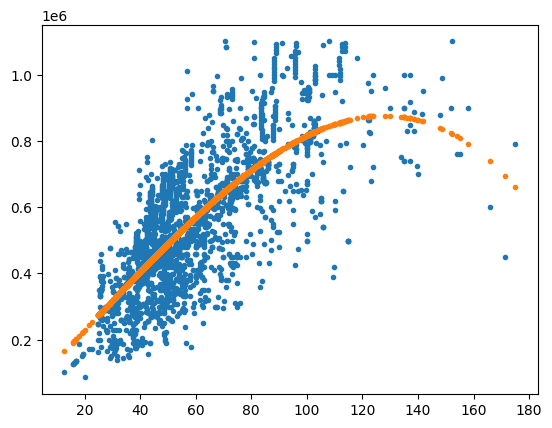

In [ ]:
plt.plot(X, y, '.')
plt.plot(X, lr.predict(X_poly), '.')

In [ ]:
X = df[numeric_features + categorical_features]

In [ ]:
cf = ColumnTransformer(
    transformers = [
        ('sc', sc, numeric_features),
        ('pf', pf, numeric_features),
        ('ohe', ohe, categorical_features)
    ]
)

In [ ]:
X_processed = cf.fit_transform(X)

In [ ]:
cf.get_feature_names_out()

array(['sc__area', 'sc__rooms', 'pf__area', 'pf__rooms', 'pf__area^2',
       'pf__area rooms', 'pf__rooms^2', 'pf__area^3', 'pf__area^2 rooms',
       'pf__area rooms^2', 'pf__rooms^3', 'ohe__location_Koszutka',
       'ohe__location_Wełnowiec-Józefowiec', 'ohe__location_Śródmieście',
       'ohe__location_infrequent_sklearn'], dtype=object)

In [ ]:
lr = LinearRegression()
lr.fit(X_processed, y)

LinearRegression()

In [ ]:
lr.score(X_processed, y)

0.6211064578497019

# Drzewa decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = df[['area']]

In [ ]:
dtr = DecisionTreeRegressor(max_depth=3,
                            min_samples_leaf = 20,
                            min_samples_split = 30
                            )

In [ ]:
dtr.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, min_samples_split=30)

In [ ]:
dtr.score(X, y)

0.6701666590885066

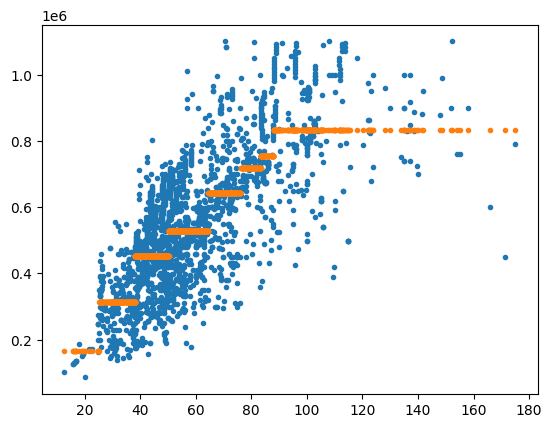

In [ ]:
plt.plot(X, y, '.')
plt.plot(X, dtr.predict(X), '.')

In [ ]:
from sklearn import tree

In [ ]:
dtr.feature_names_in_

array(['area'], dtype=object)

In [ ]:
tr = tree.export_text(dtr,
                      feature_names = dtr.feature_names_in_)

print(tr)

|--- area <= 64.50
|   |--- area <= 38.10
|   |   |--- area <= 25.32
|   |   |   |--- value: [166524.39]
|   |   |--- area >  25.32
|   |   |   |--- value: [312444.78]
|   |--- area >  38.10
|   |   |--- area <= 50.33
|   |   |   |--- value: [453181.05]
|   |   |--- area >  50.33
|   |   |   |--- value: [527446.22]
|--- area >  64.50
|   |--- area <= 83.46
|   |   |--- area <= 76.15
|   |   |   |--- value: [642290.92]
|   |   |--- area >  76.15
|   |   |   |--- value: [717986.92]
|   |--- area >  83.46
|   |   |--- area <= 88.15
|   |   |   |--- value: [755434.68]
|   |   |--- area >  88.15
|   |   |   |--- value: [834106.82]



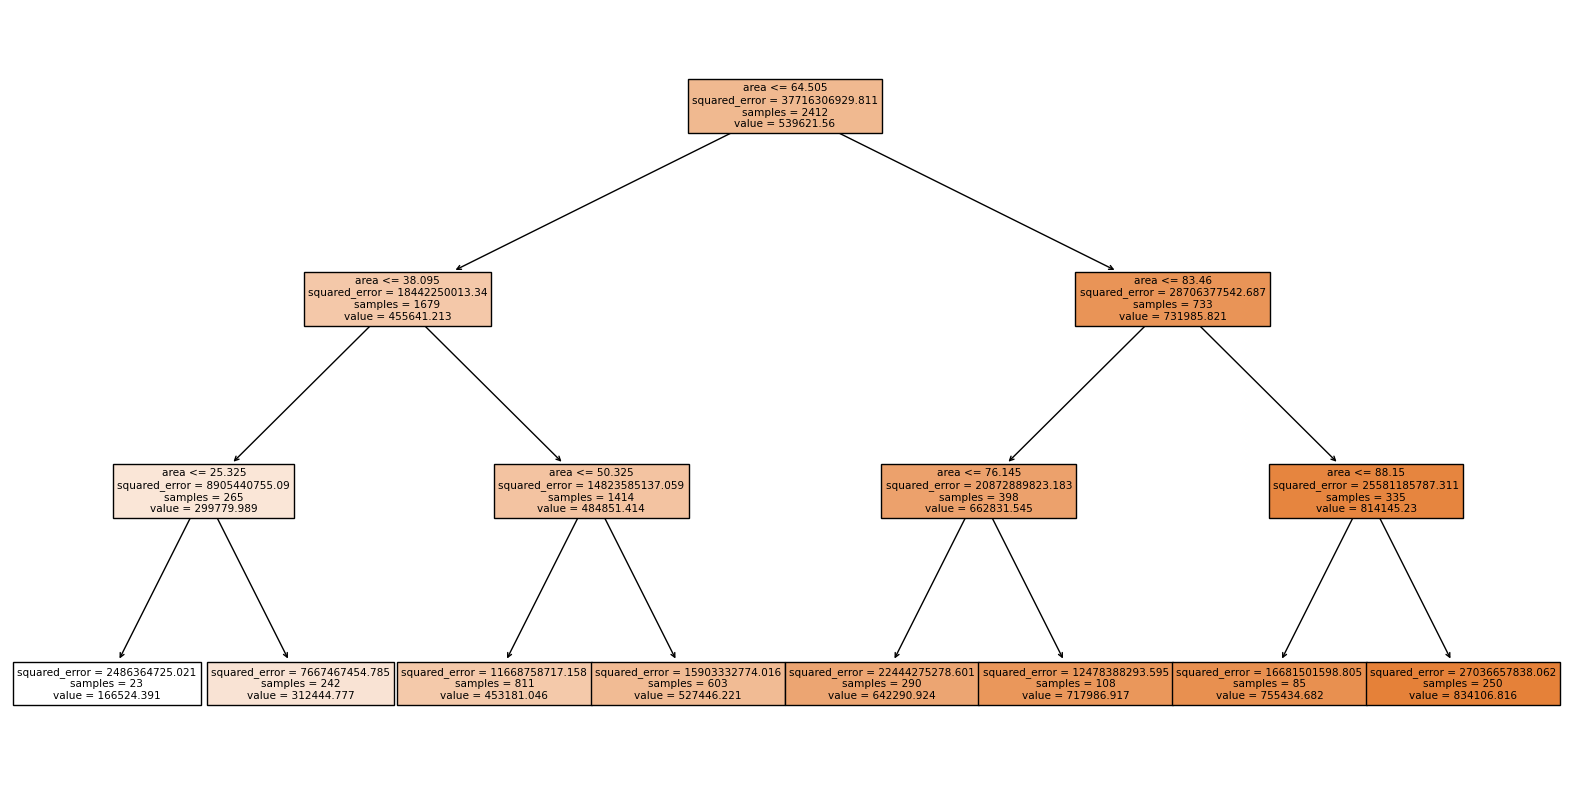

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

tree.plot_tree(dtr,
               feature_names = dtr.feature_names_in_,
               filled= True)

plt.show()

# Podział zbiorów

## Podział na zbiór treningowy, walidacyjny i testowy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['area', 'rooms', 'location']]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X)

2412

In [ ]:
len(X_train)

1929

In [ ]:
1929/2412

0.7997512437810945

### Wydzielenie zbioru walidacyjnego

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.2,
                                                    random_state=42)

### Przygotowanie zbioru treningowego

In [ ]:
numeric_features = ['area', 'rooms']
categorical_features = ['location']

In [ ]:
sc = StandardScaler()
pf = PolynomialFeatures(degree=3)
ohe = OneHotEncoder(handle_unknown='ignore',
                    min_frequency=0.1)

In [ ]:
cf = ColumnTransformer(
    transformers = [
        ('sc', sc, numeric_features),
        ('pf', pf, numeric_features),
        ('ohe', ohe, categorical_features)
    ]
)

In [ ]:
X_train_processed = cf.fit_transform(X_train)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
lr.score(X_train_processed, y_train)

0.6081127353881095

### Walidacja modelu

In [ ]:
X_val_processed = cf.transform(X_val)

In [ ]:
lr.score(X_val_processed, y_val)

0.6499271126705175

### Test modelu

In [ ]:
X_test_processed = cf.transform(X_test)

In [ ]:
lr.score(X_test_processed, y_test)

0.6117320438784276

# Walidacja krzyżowa

In [ ]:
X = df[['area', 'rooms', 'location']]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtr = DecisionTreeRegressor()

params = {'max_depth': [5, 10, 15],
          'min_samples_split': [20, 30, 40]}

In [ ]:
gs = GridSearchCV(dtr,
                  param_grid = params,
                  cv = 10,
                  verbose = 3)

In [ ]:
X_train_processed = cf.fit_transform(X_train)

In [ ]:
gs.fit(X_train_processed, y_train)

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_split=40)

In [ ]:
gs.best_score_

0.6302505347873757

In [ ]:
X_test_processed = cf.transform(X_test)

In [ ]:
gs.score(X_test_processed, y_test)

0.6282156821798708